In [187]:
# NO3/NO2

In [188]:
library(ggplot2)
library(tidyverse)

In [189]:
getwd()

[1] "/Users/brookesienkiewicz/Documents/sctld/Nutrients/mbl_nuts"

In [190]:
# sample_list<-read.csv('metadata/nitrate_sample_input.csv')
metadata<-read.csv('metadata/samples_kinda_filtered.csv')

In [191]:
no3<-read.csv('no3no2_concentrations.csv')

In [192]:
head(no3)

,Date,T,Sample,Rack.position,Cup.Number,Sample.ID,Analyte.Name,Determined.Conc.,Conc.x.ADF
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,,,NA,NA,S10,20NO2,NO3 +NO2,NA,23.1
2,,,NA,NA,S2,20N/8P,NO3 +NO2,NA,21.0
3,,,NA,NA,S1,30N/12P,NO3 +NO2,0.00000,30.0
4,,,NA,NA,S1,30N/12P,NO3 +NO2,0.00000,30.0
5,,,NA,NA,S2,20N/8P,NO3 +NO2,20.00060,20.0
6,,,NA,NA,S2,20N/8P,NO3 +NO2,20.02666,20.0


In [194]:
# plot stnd curve 

In [195]:
# get standards - pull out samples with 'S'

In [196]:
stnds<-no3 %>% 
    filter(str_detect(Cup.Number, 'S')) %>%
    # remove S10 - used to calculate efficiency of no2/no3 conversion
    filter(!Cup.Number == 'S10') %>%
    filter(!is.na(Determined.Conc.)) %>%
    # remove 30 bc for some reason its 0 -> maybe I didn't make that one?
    filter(!Cup.Number == 'S1')

In [197]:
# arrange in order of concentration (reverse order)
stnds<-stnds %>%
    arrange(desc(Cup.Number))
stnds

Date,T,Sample,Rack.position,Cup.Number,Sample.ID,Analyte.Name,Determined.Conc.,Conc.x.ADF
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
,,NA,NA,S9,Saline,NO3 +NO2,0.0062800,0.00
,,NA,NA,S9,Saline,NO3 +NO2,0.0149000,0.00
,,NA,NA,S8,0.25N/0.1P,NO3 +NO2,0.2405120,0.25
,,NA,NA,S8,0.25N/0.1P,NO3 +NO2,0.2296452,0.25
,,NA,NA,S7,0.5N/0.2P,NO3 +NO2,0.4880774,0.50
,,NA,NA,S7,0.5N/0.2P,NO3 +NO2,0.5025970,0.50
,,NA,NA,S6,1N/0.4P,NO3 +NO2,0.9806193,1.00
,,NA,NA,S6,1N/0.4P,NO3 +NO2,1.0087390,1.00
,,NA,NA,S5,2N/0.8P,NO3 +NO2,1.9833290,2.00


In [198]:
# predicted
# take the concentration from Sample.ID
stnds<-stnds %>%
    mutate(predicted.conc = as.numeric(str_extract(Sample.ID, "\\d*\\.?\\d+(?=N)"))) %>%
    # change NA to 0 for saline (serves as the 0/blank)
    mutate(predicted.conc = if_else(
        Sample.ID == "Saline",
        0,
        predicted.conc 
    ))
head(stnds)

,Date,T,Sample,Rack.position,Cup.Number,Sample.ID,Analyte.Name,Determined.Conc.,Conc.x.ADF,predicted.conc
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,,,NA,NA,S9,Saline,NO3 +NO2,0.0062800,0.00,0.00
2,,,NA,NA,S9,Saline,NO3 +NO2,0.0149000,0.00,0.00
3,,,NA,NA,S8,0.25N/0.1P,NO3 +NO2,0.2405120,0.25,0.25
4,,,NA,NA,S8,0.25N/0.1P,NO3 +NO2,0.2296452,0.25,0.25
5,,,NA,NA,S7,0.5N/0.2P,NO3 +NO2,0.4880774,0.50,0.50
6,,,NA,NA,S7,0.5N/0.2P,NO3 +NO2,0.5025970,0.50,0.50


In [199]:
# plot stnd curve - predicted vs actual since we don't have raw ODs
# x-axis predicted concentration
# y-axis calculated concentration 

In [200]:
model <- lm(Determined.Conc. ~ predicted.conc, data = stnds)

# 2. Extract the R^2 value
r_squared <- summary(model)$r.squared
r_squared

[1] 0.9999863

`geom_smooth()` using formula = 'y ~ x'


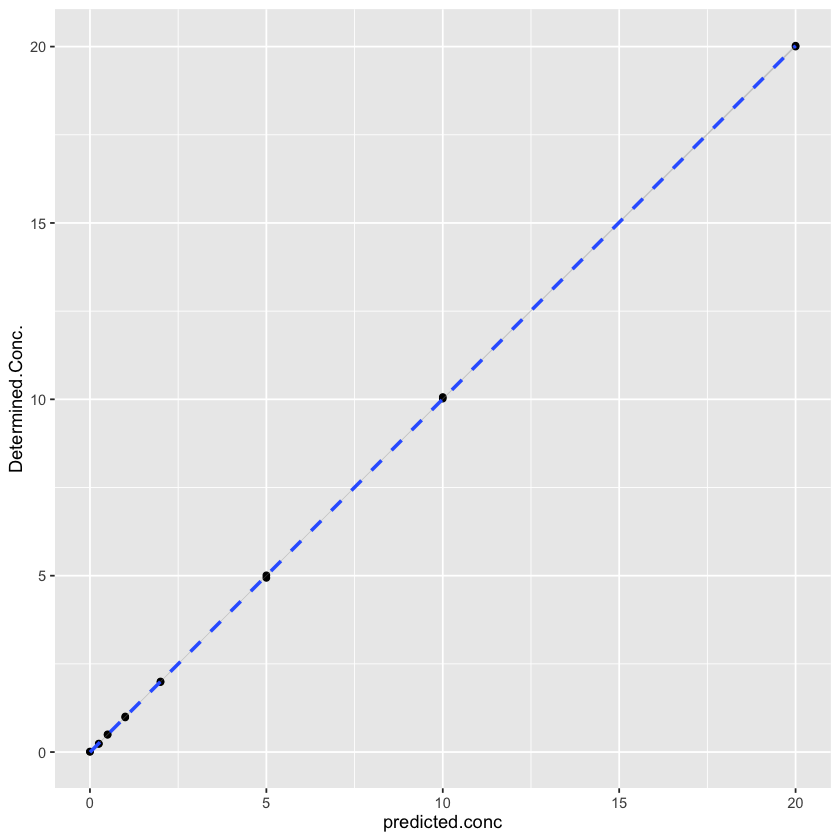

In [201]:
ggplot(data = stnds, aes(x = predicted.conc, y = Determined.Conc.))+
    geom_point() +
    geom_smooth(method = "lm", linetype = "dashed")

In [202]:
# keep only actual samples
samples_no3<-no3%>%
    filter(!is.na(Sample))

In [203]:
# convert date format
unique(samples_no3$Date)
class(samples_no3$Date)

[1] "Jan-24" "May-24" "Jun-24" "Aug-24" "Jun-25"

[1] "character"

In [204]:
samples_no3<-samples_no3 %>%
    mutate(date=as.Date(paste0("01-",samples_no3$Date), format = "%d-%b-%y"))

In [205]:
samples_no3 %>%
    filter(is.na(date))

Date,T,Sample,Rack.position,Cup.Number,Sample.ID,Analyte.Name,Determined.Conc.,Conc.x.ADF,date
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<date>


In [206]:
unique(samples_no3$date)

[1] "2024-01-01" "2024-05-01" "2024-06-01" "2024-08-01" "2025-06-01"

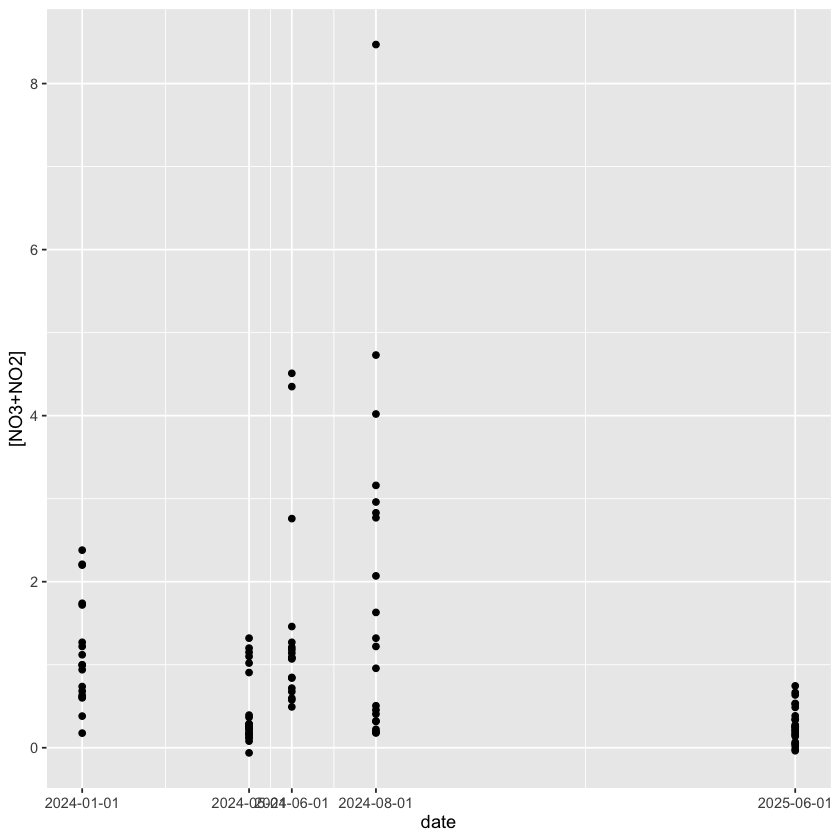

In [207]:
# plot conc by date 
ggplot(samples_no3, aes(x = date, y = Conc.x.ADF))+
    geom_point()+
    scale_x_date(breaks = unique(samples_no3$date))+
    labs(y = '[NO3+NO2]')

In [208]:
head(samples_no3)

,Date,T,Sample,Rack.position,Cup.Number,Sample.ID,Analyte.Name,Determined.Conc.,Conc.x.ADF,date
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<date>
1,Jan-24,T1,2,1,1,Sample 001,NO3 +NO2,NA,1.720,2024-01-01
2,Jan-24,T1,3,2,2,Sample 002,NO3 +NO2,NA,2.200,2024-01-01
3,Jan-24,T1,8,3,3,Sample 003,NO3 +NO2,NA,2.210,2024-01-01
4,Jan-24,T1,15,4,4,Sample 004,NO3 +NO2,NA,1.740,2024-01-01
5,Jan-24,T1,18,5,5,Sample 005,NO3 +NO2,NA,2.380,2024-01-01
6,Jan-24,T2,23,6,6,Sample 006,NO3 +NO2,NA,0.601,2024-01-01


In [209]:
#### metadata -----------------------------------------------------------------------------

In [210]:
# sample IDs are already on no3 output 
# combine with site info 

# add meta columns to sample df 
    # change format of Transect and sample ID on metadata
metadata<-metadata%>%
    mutate(T=paste0('T',transect))%>%
    rename(Sample=nutrient_sample_) %>%
    mutate(Sample = str_replace(Sample, 'N',''))%>%
    mutate(Sample = str_replace(Sample, 'filter','0')) %>%
        # idk why 0 won't convert to numeric -> its converting to NA but whatever, that sample should only be present in CHLA analysis anyway 
    mutate(Sample = as.numeric(Sample)) %>%
    #change date format 
    mutate(date = as.Date(Date))

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Sample = as.numeric(Sample)`.
Caused by warning:
! NAs introduced by coercion”


In [211]:
# get list of samples that were labelled incorrectly 
wrong_label<-metadata %>%
    filter(str_detect(notes, 'label'))
samples_to_fix<-unique(wrong_label$Sample)
samples_to_fix

[1] 18 17 15 16  8 14  3 12  2 13 62 83 64 81 68 82 70 80 23 36 24 37 27 40 31
[26] 38 33 39

In [212]:
# pull out Transect it is currently labelled as 
# pull out transect it needs to be changed to (in samples_no3)

metadata<-metadata %>%
    mutate(old_T = sapply(strsplit(metadata$notes,split = 'as '), "[",2)) %>%
    mutate(new_T = T)

In [213]:
head(metadata)

,X,Date,country,site,transect,depthm,meter,syringe,Sample,time_sampled,time_processed,nutrient,vol_filteredmL,notes,nitrate,monthyear,T,date,old_T,new_T
,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>
1,1,2024-01-08,BEL,BB,5,1.6,10,15,18,16:21,18:30,,60,labelled as T1,5_19,Jan 2024,T5,2024-01-08,T1,T5
2,2,2024-01-08,BEL,BB,5,1.6,10,,17,16:21,18:30,CHLA,180,labelled as T1,,Jan 2024,T5,2024-01-08,T1,T5
3,3,2024-01-08,BEL,BB,5,1.6,20,14,15,16:27,18:30,,60,labelled as T1,5_19,Jan 2024,T5,2024-01-08,T1,T5
4,4,2024-01-08,BEL,BB,5,1.6,20,,16,16:27,18:30,CHLA,180,labelled as T1,,Jan 2024,T5,2024-01-08,T1,T5
5,5,2024-01-08,BEL,BB,5,1.6,30,1,8,16:31,18:30,,60,labelled as T1,5_19,Jan 2024,T5,2024-01-08,T1,T5
6,6,2024-01-08,BEL,BB,5,1.6,30,,14,16:31,18:30,CHLA,120,labelled as T1,,Jan 2024,T5,2024-01-08,T1,T5


In [214]:
samples_no3<-samples_no3 %>%
    left_join(metadata%>%select(date,new_T,old_T, Sample, meter, notes, monthyear), by = 'Sample')

In [215]:
samples_no3 %>%
    filter(Sample %in% samples_to_fix) 

Date,T,Sample,Rack.position,Cup.Number,Sample.ID,Analyte.Name,Determined.Conc.,Conc.x.ADF,date.x,date.y,new_T,old_T,meter,notes,monthyear
<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>
Jan-24,T1,2,1,1,Sample 001,NO3 +NO2,NA,1.720,2024-01-01,2024-01-08,T5,T1,50,labelled as T1,Jan 2024
Jan-24,T1,3,2,2,Sample 002,NO3 +NO2,NA,2.200,2024-01-01,2024-01-08,T5,T1,40,labelled as T1,Jan 2024
Jan-24,T1,8,3,3,Sample 003,NO3 +NO2,NA,2.210,2024-01-01,2024-01-08,T5,T1,30,labelled as T1,Jan 2024
Jan-24,T1,15,4,4,Sample 004,NO3 +NO2,NA,1.740,2024-01-01,2024-01-08,T5,T1,20,labelled as T1,Jan 2024
Jan-24,T1,18,5,5,Sample 005,NO3 +NO2,NA,2.380,2024-01-01,2024-01-08,T5,T1,10,labelled as T1,Jan 2024
Jan-24,T2,23,6,6,Sample 006,NO3 +NO2,NA,0.601,2024-01-01,2024-01-09,T1,T2,10,labelled as T2,Jan 2024
Jan-24,T2,24,7,7,Sample 007,NO3 +NO2,NA,0.940,2024-01-01,2024-01-09,T1,T2,20,labelled as T2,Jan 2024
Jan-24,T2,27,8,8,Sample 008,NO3 +NO2,NA,1.120,2024-01-01,2024-01-09,T1,T2,30,labelled as T2,Jan 2024
Jan-24,T2,31,9,9,Sample 009,NO3 +NO2,NA,0.609,2024-01-01,2024-01-09,T1,T2,40,labelled as T2,Jan 2024


In [216]:
# update incorrectly labelled sample locations
samples_no3<-samples_no3 %>%
    mutate(T_copy = new_T)

# view where it has been changed 
samples_no3 %>%
    filter(T != T_copy)

Date,T,Sample,Rack.position,Cup.Number,Sample.ID,Analyte.Name,Determined.Conc.,Conc.x.ADF,date.x,date.y,new_T,old_T,meter,notes,monthyear,T_copy
<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Jan-24,T1,2,1,1,Sample 001,NO3 +NO2,NA,1.720,2024-01-01,2024-01-08,T5,T1,50,labelled as T1,Jan 2024,T5
Jan-24,T1,3,2,2,Sample 002,NO3 +NO2,NA,2.200,2024-01-01,2024-01-08,T5,T1,40,labelled as T1,Jan 2024,T5
Jan-24,T1,8,3,3,Sample 003,NO3 +NO2,NA,2.210,2024-01-01,2024-01-08,T5,T1,30,labelled as T1,Jan 2024,T5
Jan-24,T1,15,4,4,Sample 004,NO3 +NO2,NA,1.740,2024-01-01,2024-01-08,T5,T1,20,labelled as T1,Jan 2024,T5
Jan-24,T1,18,5,5,Sample 005,NO3 +NO2,NA,2.380,2024-01-01,2024-01-08,T5,T1,10,labelled as T1,Jan 2024,T5
Jan-24,T2,23,6,6,Sample 006,NO3 +NO2,NA,0.601,2024-01-01,2024-01-09,T1,T2,10,labelled as T2,Jan 2024,T1
Jan-24,T2,24,7,7,Sample 007,NO3 +NO2,NA,0.940,2024-01-01,2024-01-09,T1,T2,20,labelled as T2,Jan 2024,T1
Jan-24,T2,27,8,8,Sample 008,NO3 +NO2,NA,1.120,2024-01-01,2024-01-09,T1,T2,30,labelled as T2,Jan 2024,T1
Jan-24,T2,31,9,9,Sample 009,NO3 +NO2,NA,0.609,2024-01-01,2024-01-09,T1,T2,40,labelled as T2,Jan 2024,T1


In [217]:
# check for NAs 
samples_no3 %>%
    filter(is.na(T_copy))

# ...exclude for now idk where these came from -> need to check in data sheets 
excluded_samples<-samples_no3 %>%
    filter(is.na(T_copy))
samples_no3<-samples_no3 %>%
    filter(!is.na(T_copy))

Date,T,Sample,Rack.position,Cup.Number,Sample.ID,Analyte.Name,Determined.Conc.,Conc.x.ADF,date.x,date.y,new_T,old_T,meter,notes,monthyear,T_copy
<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
May-24,T5,269,38,38,Sample 038,NO3 +NO2,NA,1.320,2024-05-01,NA,NA,NA,NA,NA,NA,NA
Jun-24,T1,308,45,45,Sample 045,NO3 +NO2,NA,0.718,2024-06-01,NA,NA,NA,NA,NA,NA,NA


In [218]:
# filter columns 
samples_no3<-samples_no3 %>%
    select(-T,-old_T,-new_T,-Date) %>%
    rename(T = T_copy)

In [219]:
samples_no3 %>%
    filter(is.na(date.y))

Sample,Rack.position,Cup.Number,Sample.ID,Analyte.Name,Determined.Conc.,Conc.x.ADF,date.x,date.y,meter,notes,monthyear,T
<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<date>,<date>,<chr>,<chr>,<chr>,<chr>


In [220]:
# add location names 
samples_no3<-samples_no3 %>%
    mutate(site = case_when(
        T == 'T1' ~ 'CBC30N',
        T == 'T2' ~ 'SR30N',
        T == 'T3' ~ 'Lagoon',
        T == 'T5' ~ 'BB',
        T == 'T6' ~ 'Hangman'))

In [221]:
head(samples_no3)

,Sample,Rack.position,Cup.Number,Sample.ID,Analyte.Name,Determined.Conc.,Conc.x.ADF,date.x,date.y,meter,notes,monthyear,T,site
,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2,1,1,Sample 001,NO3 +NO2,NA,1.720,2024-01-01,2024-01-08,50,labelled as T1,Jan 2024,T5,BB
2,3,2,2,Sample 002,NO3 +NO2,NA,2.200,2024-01-01,2024-01-08,40,labelled as T1,Jan 2024,T5,BB
3,8,3,3,Sample 003,NO3 +NO2,NA,2.210,2024-01-01,2024-01-08,30,labelled as T1,Jan 2024,T5,BB
4,15,4,4,Sample 004,NO3 +NO2,NA,1.740,2024-01-01,2024-01-08,20,labelled as T1,Jan 2024,T5,BB
5,18,5,5,Sample 005,NO3 +NO2,NA,2.380,2024-01-01,2024-01-08,10,labelled as T1,Jan 2024,T5,BB
6,23,6,6,Sample 006,NO3 +NO2,NA,0.601,2024-01-01,2024-01-09,10,labelled as T2,Jan 2024,T1,CBC30N


In [229]:
# blanks?
metadata %>%
    filter(str_detect(nutrient,'BLANK'))

X,Date,country,site,transect,depthm,meter,syringe,Sample,time_sampled,time_processed,nutrient,vol_filteredmL,notes,nitrate,monthyear,T,date,old_T,new_T
<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>
161,2025-05-30,BEL,CBC30N,1,NA,DI,,93,,13:55,FILTER BLANK,60,,8_27_25,Jun 2025,T1,2025-05-30,NA,T1
167,2025-05-30,BEL,CBC30N,1,NA,,,0,,13:55,FILTER BLANK,150,,,Jun 2025,T1,2025-05-30,NA,T1


In [233]:
# remove blank
samples_no3<-samples_no3 %>%
    filter(!Sample == 93)

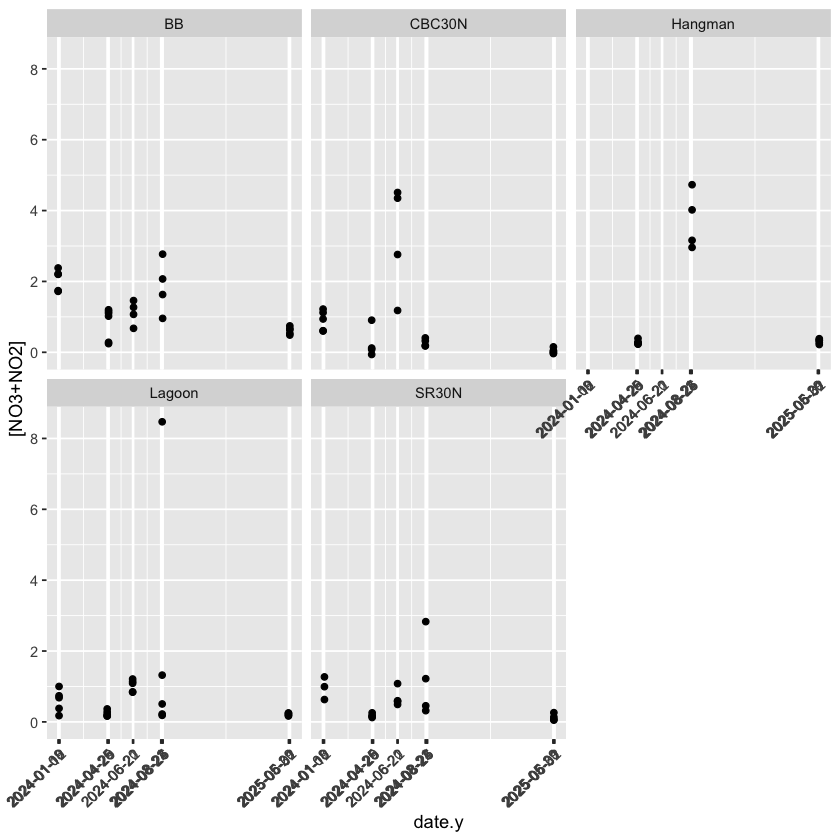

In [234]:
# facet by location 
ggplot(samples_no3, aes(x = date.y, y = Conc.x.ADF))+
    geom_point()+
    facet_wrap(~ site)+
    scale_x_date(breaks = unique(samples_no3$date.y))+
    labs(y = '[NO3+NO2]')+
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [ ]:
# highest in hangman aug and CBC30n june ??

In [237]:
# get avgs 
samples_no3 %>%
    group_by(site,date.y,monthyear) %>%
    summarise(n_mean = mean(Conc.x.ADF),
             sd = sd(Conc.x.ADF)) 

`summarise()` has grouped output by 'site', 'date.y'. You can override using
the `.groups` argument.


site,date.y,monthyear,n_mean,sd
<chr>,<date>,<chr>,<dbl>,<dbl>
BB,2024-01-08,Jan 2024,2.0500000,0.30083218
BB,2024-04-28,Apr 2024,0.8326667,0.44541157
BB,2024-06-22,Jun 2024,1.1190000,0.33552546
BB,2024-08-25,Aug 2024,1.8567500,0.76167945
BB,2025-06-01,Jun 2025,0.6132000,0.10371451
CBC30N,2024-01-09,Jan 2024,0.8980000,0.28568427
CBC30N,2024-04-25,Apr 2024,0.2609750,0.43702613
CBC30N,2024-06-21,Jun 2024,3.2000000,1.56126017
CBC30N,2024-08-21,Aug 2024,0.2740000,0.10954451


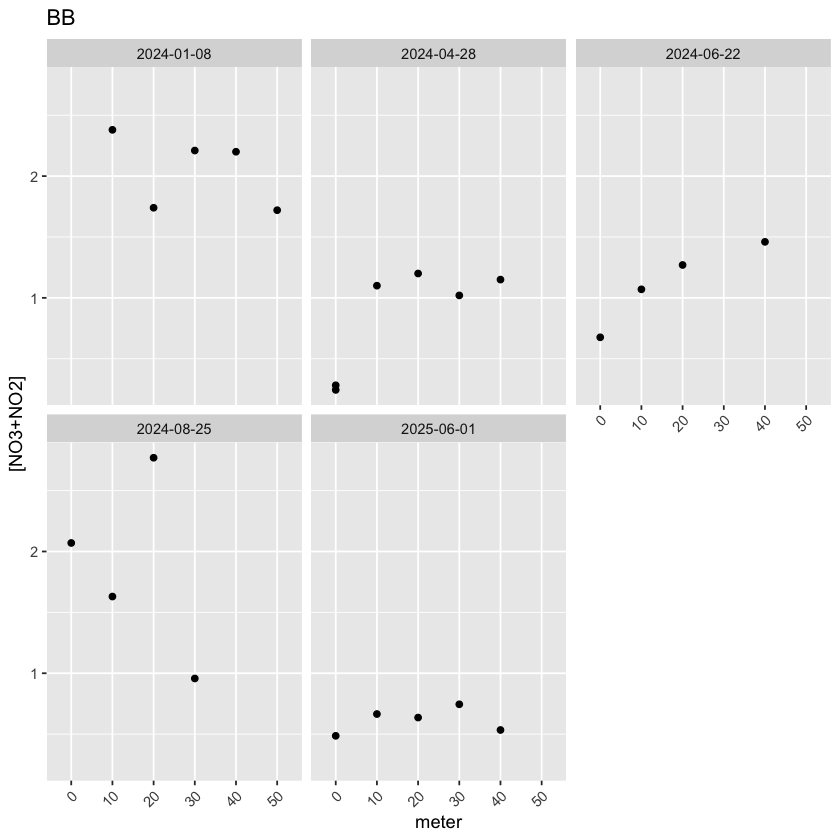

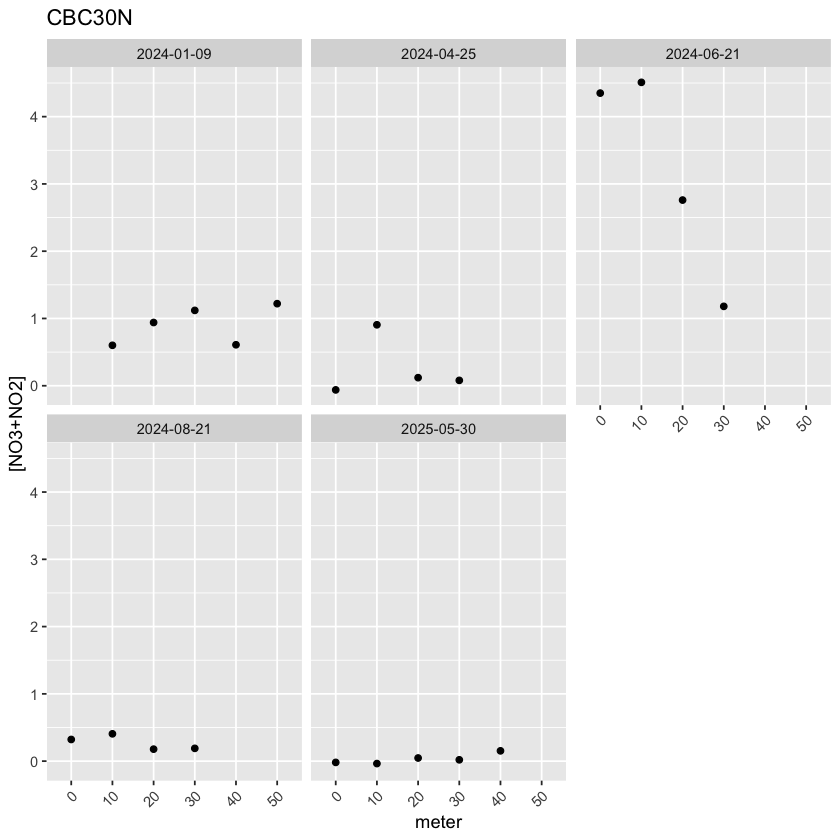

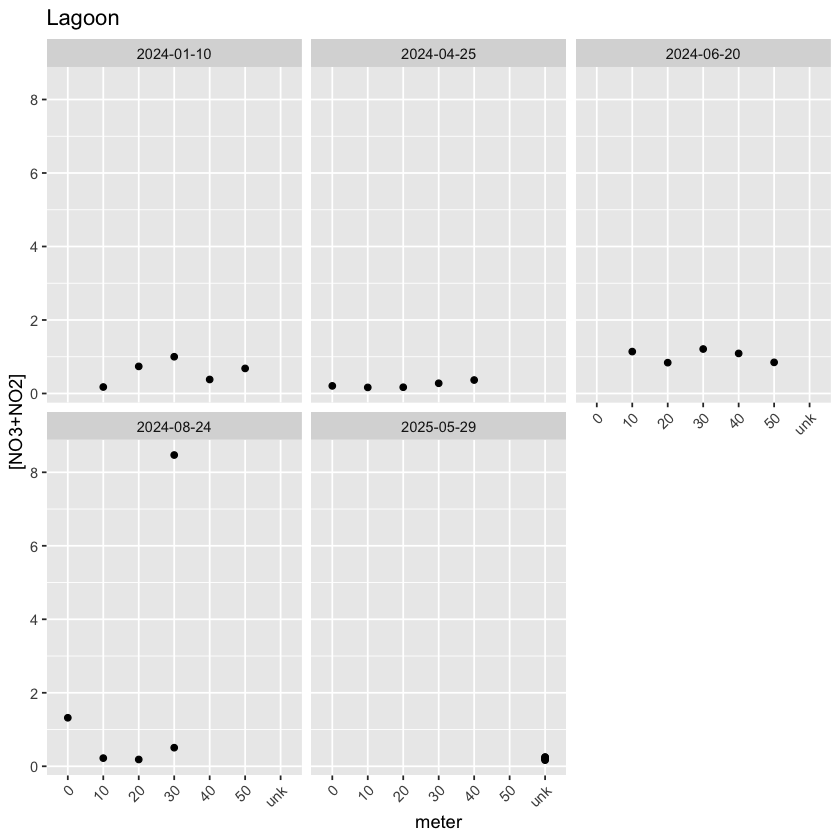

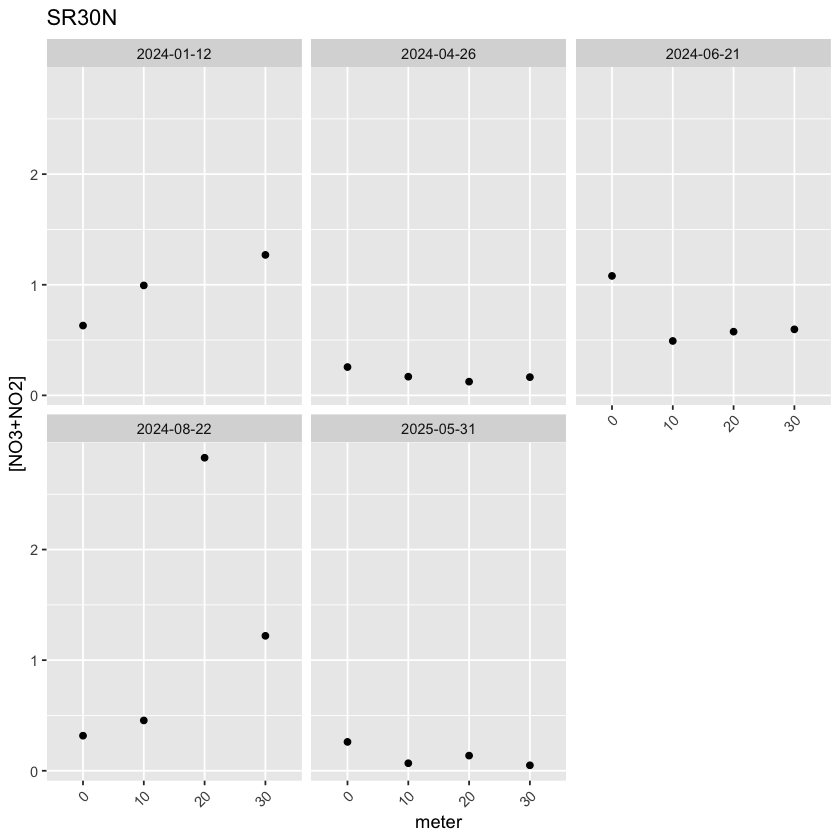

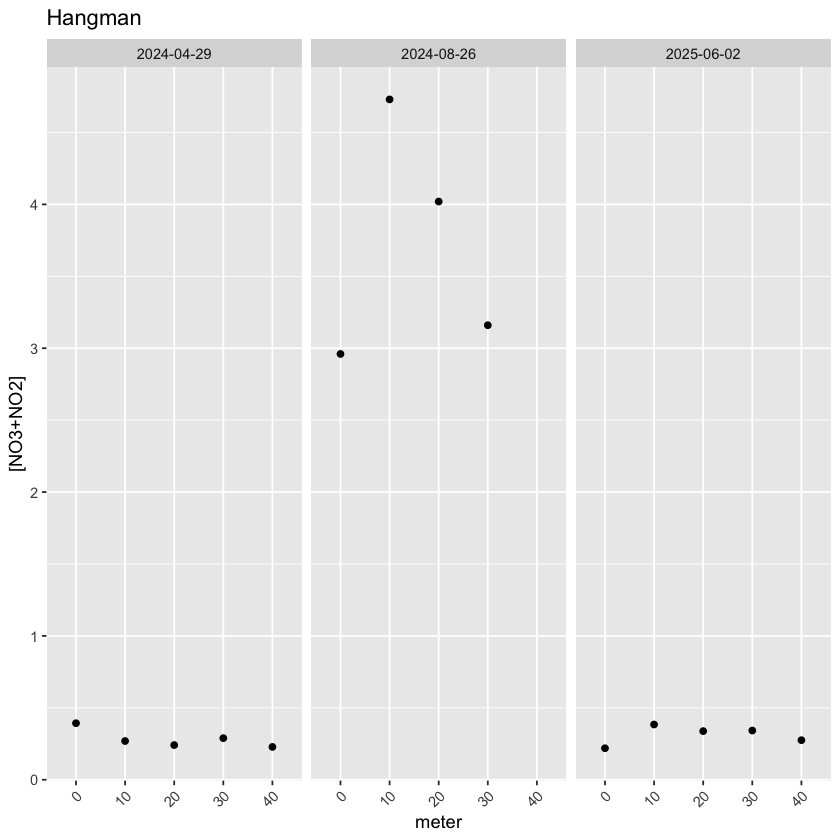

In [249]:
# variation within site within sample time point 
for (sites in unique(samples_no3$site)){
    x<-ggplot(samples_no3%>%filter(site==sites), aes(x = meter, y = Conc.x.ADF))+
        geom_point()+
        facet_wrap(~ date.y)+
        # scale_x_date(breaks = unique(samples_no3$meter))+
        labs(y = '[NO3+NO2]',title = sites)+
        theme(axis.text.x = element_text(angle = 45, hjust = 1))
    print(x)
    }

In [239]:
# get avgs 
samples_no3 %>%
    group_by(site,date.y,monthyear,meter) %>%
    summarise(n_mean = mean(Conc.x.ADF),
             sd = sd(Conc.x.ADF)) 

`summarise()` has grouped output by 'site', 'date.y', 'monthyear'. You can
override using the `.groups` argument.


site,date.y,monthyear,meter,n_mean,sd
<chr>,<date>,<chr>,<chr>,<dbl>,<dbl>
BB,2024-01-08,Jan 2024,10,2.3800,NA
BB,2024-01-08,Jan 2024,20,1.7400,NA
BB,2024-01-08,Jan 2024,30,2.2100,NA
BB,2024-01-08,Jan 2024,40,2.2000,NA
BB,2024-01-08,Jan 2024,50,1.7200,NA
BB,2024-04-28,Apr 2024,0,0.2630,0.02687006
BB,2024-04-28,Apr 2024,10,1.1000,NA
BB,2024-04-28,Apr 2024,20,1.2000,NA
BB,2024-04-28,Apr 2024,30,1.0200,NA
